# Morfología<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**


#  📙 Filtering
Filtering is a technique for modifying or enhancing an image. In essence, a filter is a mathematical function that is applied to images. It can be used to emphasize or remove certain features, like edges. Smoothing, sharpening and edge detection. So we can say, Filtering is a tecknique for :
- Mdifying or enhancing an image.
- Emphasize or remove certain features, like edges.
- Smoothing, sharpening.
- Edge detection

Filtering is a neighborhood operation. Where, **Neighborhood** mean: It is a image processing operations involve processing an image in sections, called blocks or neighborhoods, rather than processing the entire image at once. Filtering, histogram equalization for contrast enhancement, and morphological functions, all three of which use this approach.

### 📌 Edge Detection
With filtering we can detect edges. This technique can be used to find the boundaries of objects within images. As well as segment and extract information like how many coins are in an image. Most of the shape information of an image is enclosed in edges.

Edge detection works by detecting discontinuities in brightness. Like in this image, where we spot the chocolate kisses shapes in the image.

Original            |  Edges with Sobel
:-------------------------:|:-------------------------:
![](./sampleImages/Chapter2/originalChocolate.png)  |  ![](./sampleImages/Chapter2/edgeWithSobel.png)

<br/>

### 📌 Edge Detection Algorithm
#### Sobel
A common edge detection algorithm is **Sobel**. This is a filter that we can find in scikit image's module filters with the sobel function. We apply the filter by passing the image we want to detect the edges from as parameter. This function requires a 2-dimensional grayscale image as input. So in the case of a colored image, we'll need to convert it to grayscale first. Then, we show the original and the resulting image with a function that uses Matplotlib subplots.

```python
# Import module and function
from skimage.filters import sobel

# Apply edge detection filter
edge_sobel = sobel(image_coins)

# Show original and resulting image to compare
plot_comparison(image_coins, edge_sobel, "Edge with Sobel")
```

Original            |  Edges with Sobel
:-------------------------:|:-------------------------:
![](./sampleImages/Chapter2/original_coin.png)  |  ![](./sampleImages/Chapter2/edgeWithSobelCoin.png)

<br/>

#### Comparing plots
Fuction for comparing a original and filtered image (This function details is not discussed in this course)

```python
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')
```


### 📌 Smoothing
#### Gaussian smoothing
We can achieve this with a Gaussian filter. This technique is typically used to blur an image or to reduce noise. Lets see how we can do this with Scikit image using this picture of me in Amsterdam.

We import the Gaussian function from the filters module of scikit-image. To apply the filter, the original image is passed as first parameter to the Gaussian function and the multichannel boolean parameter is set to True if the image is colored, otherwise it needs to be set to False. Finally, lets compare the original and the resulting image.

```python
# Import the module and function
from skimage.filters import gaussian

# Apply edge detection filter
gaussian_image = gaussian(amsterdam_pic, multichannel=True)

# Show original and resulting image to compare
plot_comparison(amsterdam_pic, gaussian_image, "Blurred with Gaussian filter")
```
Guassian filter can blur the image and remove noise from image


<br/>

### 📝 Edge detection
In this exercise, we'll detect edges in an image by applying the Sobel filter.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

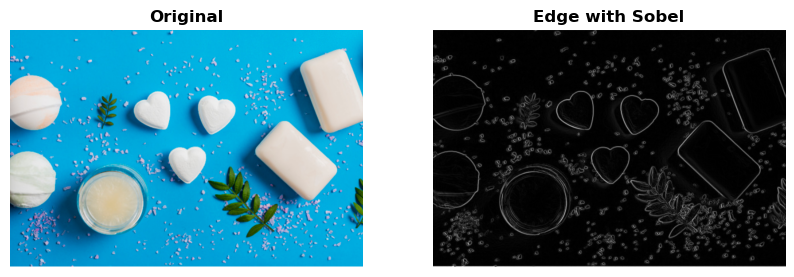

In [2]:
from skimage import color
from skimage.filters import sobel

soaps_image = plt.imread('./sampleImages/Chapter2/soap_image.png')

# Make the image grayscale
soaps_image_gray = color.rgb2gray(color.rgba2rgb(soaps_image))

# apply edge detection filters
edge_sobel = sobel(soaps_image_gray)

# Show Comparison
plot_comparison(soaps_image, edge_sobel, "Edge with Sobel")

<br/>

### 📝 Blurring to reduce noise
In this exercise we will reduce the sharpness of an image of a building taken during a London trip, through filtering.

In [3]:
from skimage.filters import gaussian

# Read the image
building_image = plt.imread('./sampleImages/Chapter2/building.png')

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show Comparison
plot_comparison(building_image, gaussian_image, "Gaussian Smoothing")

TypeError: gaussian() got an unexpected keyword argument 'multichannel'

<br/><br/>

#  📙 Contrast Enhancement
Image enhancement can be extremely useful in multiple areas. Often medical images like this X-ray can have low contrast, making it hard to spot important details. When we improve the contrast,the details become more visible. It's definitely easier to spot things on this one!

The **Contrast** of an image can be seen as the measure of its dynamic range, or the "spread" of its histogram. Consider this image. 

<img src="./sampleImages/Chapter2/imageHistogram.png" center/>

The contrast is the difference between the maximum and minimum pixel intensity in the image. The histogram of this image is shown on the right. The maximum value of pixel intensity is 255 while the minimum is 0. 255 - 0 = 255.

An image of low contrast has small difference between its dark and light pixel values. Is usually skewed either to the right (being mostly light), to the left (when is mostly dark), or located around the middle (mostly gray).


<img src="./sampleImages/Chapter2/histogramImage.png" center/>

<br/>

## Enhance contrast
- Contrast stretching (It is used to stretch the histogram so the full range of intensity values of the image is filled)
- Histogram equalization (spreads out the most frequent histogram intensity values using probability distribution)
    - Histogram equalization
    - Adaptive histogram equalization
    - Contrast Limited Adaptive Histogram Equalization (CLAHE)


### 📌 Histogram equalization
As we have seen Histogram equalization spreads out the most frequent intensity values.

To apply this type of histogram equalization import the exposure module from scikit-image. We then have access to all equalization methods. In this case, the equalize_hist function, applies normal histogram equalization to the original image. Then we show both images, the original and equalized one to see the difference.
```python
from skimage import exposure

# Obtain the equalized image
image_eq = exposure.equalize_hist(image)

# Show original and result
show_image(image, 'Original')
show_image(image_eq, 'Histogram equalized')
```

<img src="./sampleImages/Chapter2/hiequ.png" center/>

Using Histogram equalization We get a result that, despite the increased contrast, doesn't look natural. In fact, it doesn't even look like the image has been enhanced at all.

<br/>

### 📌 Adaptive Equalization
Adaptive Equalization computes several histograms, each corresponding to a distinct part of the image, and uses them to redistribute the lightness values of the image histogram. A type of this method is the Contrastive Limited Adaptive Histogram Equalization (CLAHE) which was developed to prevent over-amplification of noise that adaptive histogram equalization can give rise to. In this image, we see the result of the CLAHE method and it may seem very similar to the standard method.

**Adaptive method is not that intense, so it looks more natural.** This is because it is not taking the global histogram of the entire image, but operates on small regions called tiles or neighborhoods.

#### CLAHE in scikit-image
```python
from skimage import exposure

# Apply adaptive Equalization
image_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

# Show original and result
show_image(image, 'Original')
show_image(image_adapteq, 'Adaptive equalized')
```

<img src="./sampleImages/Chapter2/adaptive.png" center/>



<br/>

### 📝 Medical images
We are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details. You'll test our code on a chest X-ray image from the National Institutes of Health Chest X-Ray Dataset

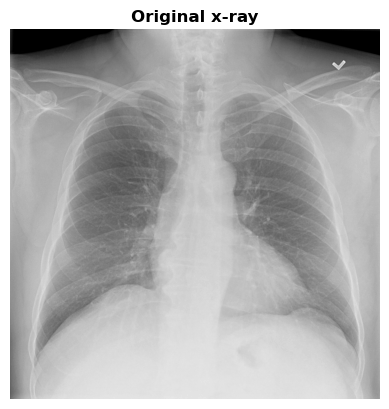

In [4]:
from skimage import exposure

chest_xray_image = plt.imread('./sampleImages/Chapter2/chest_xray_image.png')

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

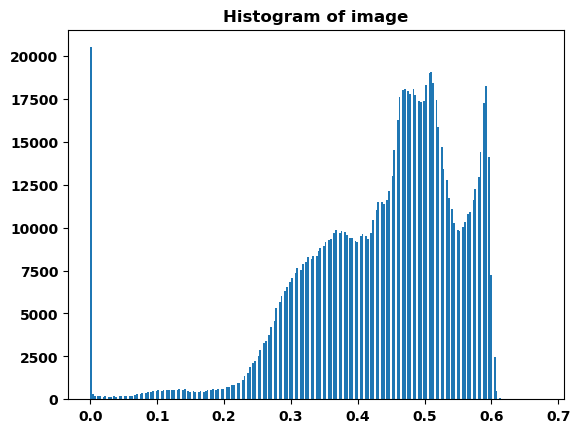

In [5]:
plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256);

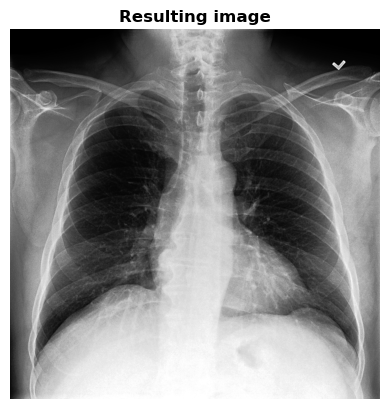

In [6]:
xray_image_eq = exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

<br/><br/>

### 📝 Aerial image
In this exercise, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.

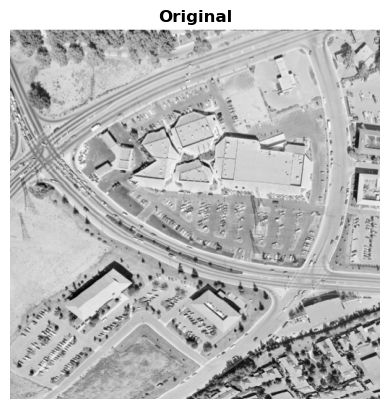

In [7]:
image_aerial = plt.imread('./sampleImages/Chapter2/arial_image.png')

# Show the original image
show_image(image_aerial, 'Original')

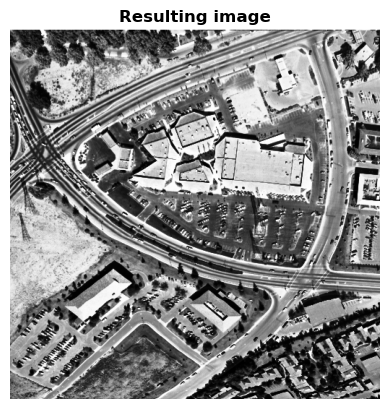

In [8]:
# Use histogram equalization to improve the contrast
image_eq = exposure.equalize_hist(image_aerial)

show_image(image_eq, 'Resulting image')

<br/><br/>

### 📝Let's add some impact and contrast
Sometimes we want to enhance the contrast of your photos so that they appear more dramatic?

In this exercise, you'll increase the contrast of a cup of coffee. Even though this is not our Sunday morning coffee cup, you can still apply the same methods to any of our photos.


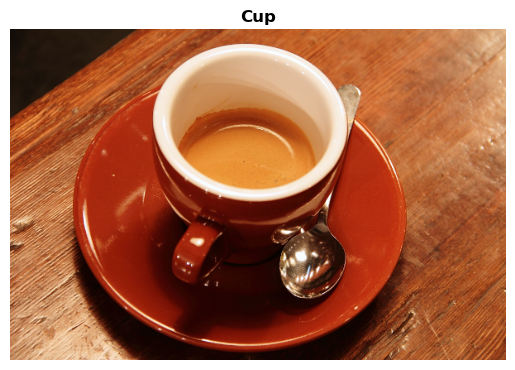

In [9]:
from skimage import data

# Load the image 
original_image = data.coffee()

# Compare the original image
show_image(original_image, "Cup")

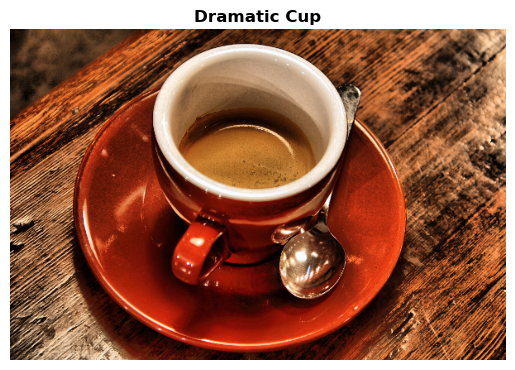

In [10]:
# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

show_image(adapthist_eq_image, 'Dramatic Cup')

<br/><br/>

#  📙 Transformations
Sometimes we might need to transform images by rotating or resizing them. But whay we need to transform a image?

- Preparing images for classication Machine Learning models
- Optimization and compression of images
- Save images with same proportion

### 📌 Rotating
We can use the rotate function from scikit-image module "transform" to rotate an image by a certain angle around its center Once we import the module and function. In this code we are obtaining the rotated image with 90 degrees clockwise. The first parameter is the image we want to rotate and the second parameter is the angle. The rotation angle is in degrees in counter-clockwise or anticlockwise direction. So we use negative values. 

##### Rotating Clockwise
```python
from skimage.transform import rotate

# Rotate the image 90 degrees clockwise
image_rotated = rotate(image, -90)
show_image(image_rotated, 'Original')

# Show the rotated image
show_image(image_rotated, 'Rotated 90 degrees clockwise')
```

##### Rotating Anti-Clockwise
```python
from skimage.transform import rotate

# Rotate the image 90 degrees clockwise
image_rotated = rotate(image, 90)
show_image(image_rotated, 'Original')

# Show the rotated image
show_image(image_rotated, 'Rotated 90 degrees anti clockwise')
```

### 📌 Rescaling
We can use the rescale function from the transform module. Once imported, in this example we make an image to be 4 times smaller than its original size by setting the scaling factor to 1/4. Setting an anti_aliasing boolean parameter to true specifies if applying a filter to smooth the image prior to down-scaling.

```python
from skimage.transform import rescale

# Rescale the image to be 4 times smaller
image_rescaled = rescale(image, 1/4, anti_aliasing=True, multichannel=True)

show_image(image, 'Original image')
show_image(image_rescaled,'Rescaled image')
```

#### Aliasing in digital images
In a digital image, aliasing is a pattern or a rippling effect. Aliasing makes the image look like it has waves or ripples radiating from a certain portion. This happens because the pixelation of the image is poor; when they simply do not look right.

<img src="./sampleImages/Chapter2/aliasing.png" center/>

Here, we applied a resizing of 1/30, and we see what the anti_aliasing filter is doing to the image when is set. The first one has the anti_aliasing to True so we see is softer. While the one without it is pixelated.

### 📌 Resizing
Resizing is used for making images match a certain size. The same purpose as rescale, but allows to specify an output image shape instead of a scaling factor.

```python
from skimage.transform import resize

# Height and width to resize
height = 400
width = 500

# Resize image
image_resized = resize(image, (height, width), anti_aliasing=True)

# Show the original and resulting images
show_image(image, 'Original image')
show_image(image_resized, 'Resized image')
```

#### Resizing proportionally
If we want to avoid disproportionate dimensions, we can resize an image proportionally. By taking the original width size of the image and dividing it by the scaling factor.

```python
from skimage.transform import resize

# Set proportional height so its 4 times its size
height = image.shape[0] / 4
width = image.shape[1] / 4

# Resize image
image_resized = resize(image, (height, width), anti_aliasing=True)

show_image(image_resized, 'Resized image')
```


<br/><br/>

### 📝Aliasing, rotating and rescaling

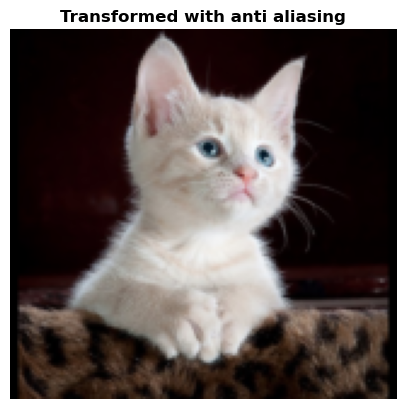

In [13]:
from skimage.transform import rotate, rescale

image_cat = plt.imread('./sampleImages/Chapter2/image_cat.jpg')

# Rotate the image 90 degress clockwise
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, channel_axis=-1)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, channel_axis=-1)

# Show the anti-aliased image
show_image(rescaled_with_aa, 'Transformed with anti aliasing')

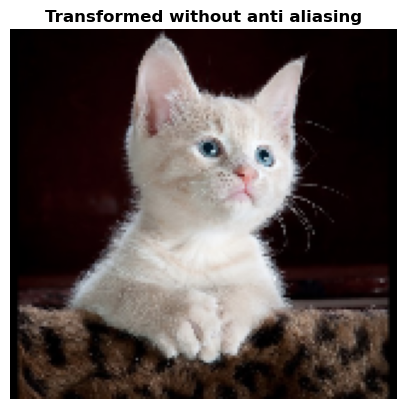

In [14]:
show_image(rescaled_without_aa, 'Transformed without anti aliasing')

<br/><br/>

### 📝Enlarging images
Have you ever tried resizing an image to make it larger? This usually results in loss of quality, with the enlarged image looking blurry.

The good news is that the algorithm used by scikit-image works very well for enlarging images up to a certain point.

In this exercise you'll enlarge an image three times!!

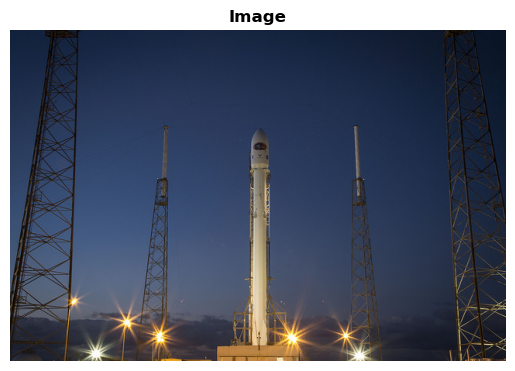

In [15]:
from skimage.transform import rescale

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, channel_axis=-1)

# Show the original image
show_image(rocket_image)


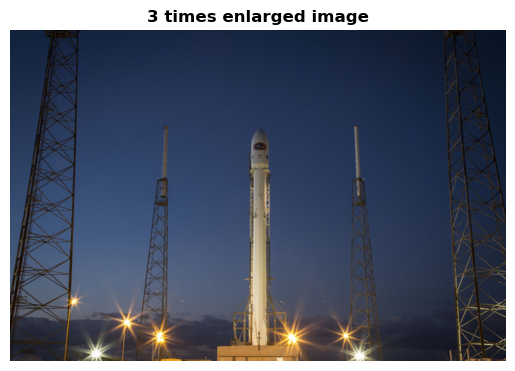

In [16]:
show_image(enlarged_rocket_image, '3 times enlarged image')

<br/><br/>

### 📝Proportionally resizing
We want to downscale the images of a veterinary blog website so all of them have the same compressed size.

It's important that you do this proportionally, meaning that these are not distorted.

First, you'll try it out for one image so you know what code to test later in the rest of the pictures.

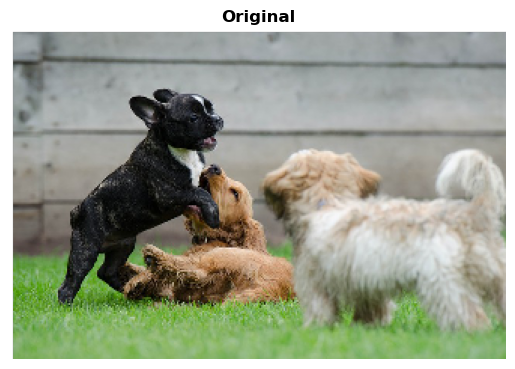

In [17]:
from skimage.transform import resize

dogs_banner = plt.imread('./sampleImages/Chapter2/dogs_banner.png')

# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width), anti_aliasing=True)

# Show the original image
show_image(dogs_banner, "Original")

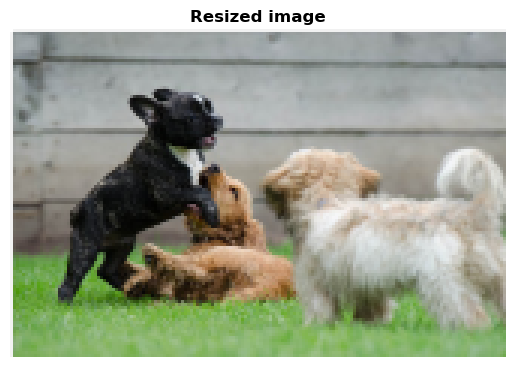

In [18]:
show_image(image_resized, 'Resized image')

<br/><br/>

#  📙 Morphology
Binary regions produced by simple thresholding can be distorted by noise and texture. To remove this kind of distortion we can use Morphology filtering.

Morphological filtering operations try to remove these imperfections by accounting for the form and structure of the objects in the image. These operations are especially suited to binary images, but some can extend to grayscale ones.

### 📌 Morphological operations
Basic morphological operations are:
- Dilation (Add pixels to the boundaries of objects in an image)
- Erosioin (Removes pixels on object boundaries )

<img src="./sampleImages/Chapter2/morphological_op.png" center />

The number of pixels added or removed from the objects in an image depends on the size and shape of a **structuring element** used to process the image.

**Struturing Element:** The structuring element is a small binary image used to probe the input image.

#### Shapes in scikit-image
scikit-image has multiple shapes for this structured element, each one with its own method from the morphology module. If we want square as the structured element, we can obtain it with the square method. Or a rectangle with width and height. This will return the desired shape and if we print we'll see how these are formed with 1s.
```python
from skimage import morphology

square = morphology.square(4)
[[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]]

rectangle = morphology.rectangle(4, 2)
[[1 1]
[1 1]
[1 1]
[1 1]]
```


### 📌 Erosion in scikit-image
```python
from skimage import morphology

# Set structuring element to the rectangular-shaped
selem = rectangle(12,6)

# Obtain the erosed image with binary erosion
eroded_image = morphology.binary_erosion(image_horse, selem=selem)

# Binary erosion with default selem (For this: we don't need to specify a selem)
eroded_image = morphology.binary_erosion(image_horse)
```

### 📌 Dilation in scikit-image
```python
from skimage import morphology

# Obtain dilated image, using binary dilation
dilated_image = morphology.binary_dilation(image_horse)

# See results
plot_comparison(image_horse, dilated_image, 'Erosion')
```

### 📝Handwritten letters
A very interesting use of computer vision in real-life solutions is performing Optical Character Recognition (OCR) to distinguish printed or handwritten text characters inside digital images of physical documents.

Let's try to improve the definition of this handwritten letter so that it's easier to classify.

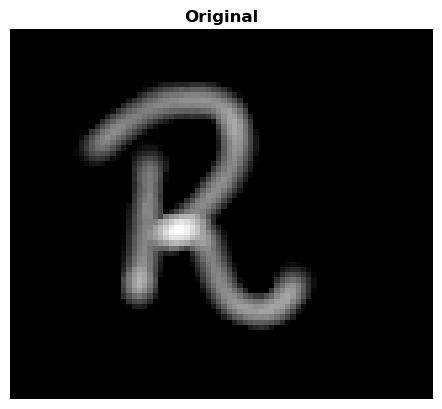

In [19]:
from skimage import morphology

upper_r_image = plt.imread('./sampleImages/Chapter2/r5.png')
upper_r_image = color.rgb2gray(upper_r_image)

# Obtain the eroded shape
eroded_image_shape = morphology.binary_erosion(upper_r_image)

# See results
show_image(upper_r_image, 'Original')

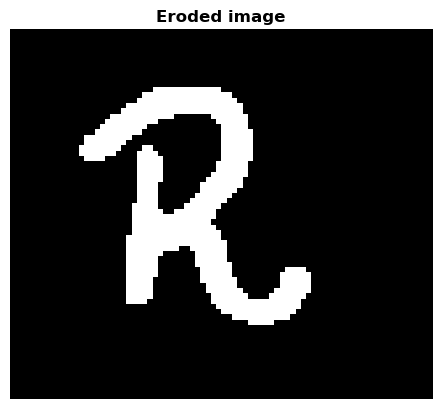

In [21]:
show_image(eroded_image_shape, 'Eroded image')

<br/><br/>

### 📝Improving thresholded image
In this exercise, we'll try to reduce the noise of a thresholded image using the dilation morphological operation.

This operation, in a way, expands the objects in the image.

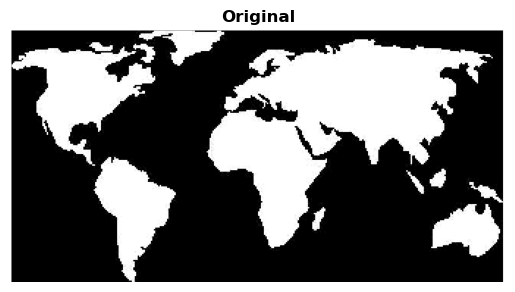

In [23]:
world_image = plt.imread('./sampleImages/Chapter2/world_image.png')

# Obtain the dilated image
dilated_image = morphology.binary_dilation(world_image)
dilated_image = color.rgb2gray(color.rgba2rgb(dilated_image))

# See the result
show_image(world_image, 'Original')

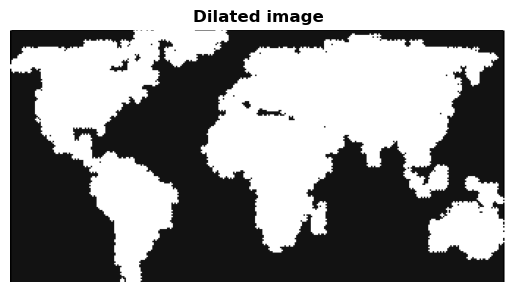

In [24]:
show_image(dilated_image, 'Dilated image')

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).